# Exploratory Data Analysis Notebook

Welcome to the Exploratory Data Analysis (EDA) Notebook. EDA is all about understanding the data, gaining insights, and identifying patterns which will inform how we model the data.

In this part of the project, we're going to dig into our movie data to see what makes a movie successful. We're looking at success in three different ways:

**Return on Investment (ROI):**

ROI is a performance measure used to evaluate the efficiency or profitability of an investment, or to compare the efficiency of different investments. In the context of movies, it's computed as the ratio of revenue to budget. This metric is crucial as it helps investors understand the financial return they might expect from their investment in a particular movie. It's a clear indicator of financial success.

**Rating Metric:**
Ratings are critical in the movie industry as they reflect the audience's reception. In this analysis, we intend to aggregate ratings from different rating systems to form an overall rating metric. This will provide a more holistic view of a movie's reception across various platforms and audiences.

**Awards Metric:**
Awards and nominations are a testament to a movie's quality and acceptance within the industry. They can significantly boost a movie's reputation and, by extension, its financial success. Creating an awards metric will help in understanding the recognition a movie has received in the industry.

Now, we'll go through our data, looking at how different bits of information (like the movie's genre or the month it was released) might affect these three success measures. This will help us later when we build our model to predict a movie's success.

## Objectives:
- **Distribution Analysis**: Understanding the distribution of various features.
- **Outlier Detection**: Detecting and handling outliers.
- **Correlation Analysis**: Identifying relationships between different variables.
- **Trend Analysis**: Discovering trends within the data.
- **Feature Engineering**: Creating new features to better capture the underlying patterns in the data.

## Dataset:
In this notebook, we will be working with the cleaned dataset located at `./data/cleaned/movies_dataset.parquet`, which is the result of the cleaning process carried out in the preceding Data Cleaning Notebook.


In [327]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [328]:
df = pd.read_parquet('../data/cleaned/movies_dataset.parquet')

In [329]:
# Set the float format to display the entire number
pd.options.display.float_format = '{:.2f}'.format
df.describe()

,release_year,release_month,runtime,tmdb_popularity,tmdb_rating,tmdb_vote_count,oscar_won,oscar_nominated,bafta_won,bafta_nominated,awards_won,awards_nominated,rotten_tomatoes_rating,metacritic_rating,imdb_rating,imdb_votes,adjusted_budget,adjusted_revenue,adjusted_boxoffice
count,5029.00,5029.00,5029.00,5029.00,5029.00,5029.00,5029.00,5029.00,5029.00,5029.00,5029.00,5029.00,4566.00,4103.00,5028.00,5029.00,5029.00,5029.00,4264.00
mean,1994.96,7.00,108.85,19.13,63.99,1656.39,0.19,0.27,0.01,0.03,5.66,9.94,56.75,55.63,64.37,105297.44,48508592.74,144838163.53,89535828.71
std,13.97,3.36,21.23,17.10,8.61,2967.52,0.84,0.89,0.12,0.21,13.49,18.29,27.88,18.42,10.35,200671.44,52952322.52,262488315.73,139440672.23
min,1947.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,17.00,22.00,356.36,582.42,507.16
25%,1988.00,4.00,95.00,9.97,58.84,199.00,0.00,0.00,0.00,0.00,0.00,1.00,33.00,42.00,58.00,13056.00,13196134.64,15672420.43,11975968.93
50%,1999.00,7.00,105.00,15.06,64.30,597.00,0.00,0.00,0.00,0.00,1.00,4.00,60.00,56.00,65.00,38150.00,31067586.91,54116811.40,45192428.69
75%,2006.00,10.00,119.00,22.65,69.87,1727.00,0.00,0.00,0.00,0.00,5.00,11.00,82.00,69.00,72.00,110295.00,63966526.32,156388449.48,109647801.13
max,2020.00,12.00,254.00,302.31,100.00,34612.00,11.00,11.00,4.00,5.00,215.00,220.00,100.00,100.00,93.00,2802199.00,512244953.43,4254454876.30,2326748295.11


### ROI

First of all, I'm going to calculate ROI. ROI is calculated by taking the total revenue of a movie, subtracting the budget, and then dividing by the budget once more.

Formula (revenue - budget) / budget * 100%

Now, why do we use the revenue and budget columns to calculate ROI and not consider the BoxOffice column?

The revenue column typically represents the global revenue generated by a movie, encompassing not just box office revenue but also other revenue streams like home video sales, TV rights, and merchandise. Also, the revenue and budget columns have more complete data as compared to the BoxOffice column, which has a number of missing values. Utilizing columns with more complete data allows for a more accurate and reliable calculation of ROI.


In [330]:
df[['adjusted_budget', 'adjusted_revenue', 'adjusted_boxoffice']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 5029 entries, 0 to 5539
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   adjusted_budget     5029 non-null   float64
 1   adjusted_revenue    5029 non-null   float64
 2   adjusted_boxoffice  4264 non-null   float64
dtypes: float64(3)
memory usage: 157.2 KB


In [331]:
df['adjusted_ROI'] = ((df['adjusted_revenue'] - df['adjusted_budget']) / df['adjusted_budget']) * 100


In [332]:
df['adjusted_ROI'].describe()

count     5029.00
mean       610.05
std       8474.69
min       -100.00
25%        -27.33
50%         91.34
75%        302.94
max     414298.50
Name: adjusted_ROI, dtype: float64

It's evident that the distribution of ROI (Return on Investment) is highly skewed with extreme outliers. This huge discrepancy between the maximum value and the 75th percentile, along with the large standard deviation, confirms the presence of extreme outliers in the data.

Let's look at what percentile our outliers lie and how many and what those movies are.

0.75      302.94
0.95     1438.40
0.99     7093.74
0.99    10897.90
1.00   414298.50
Name: adjusted_ROI, dtype: float64


/Users/olgabraginskaya/.pyenv/versions/3.11.4/envs/ml_camp/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


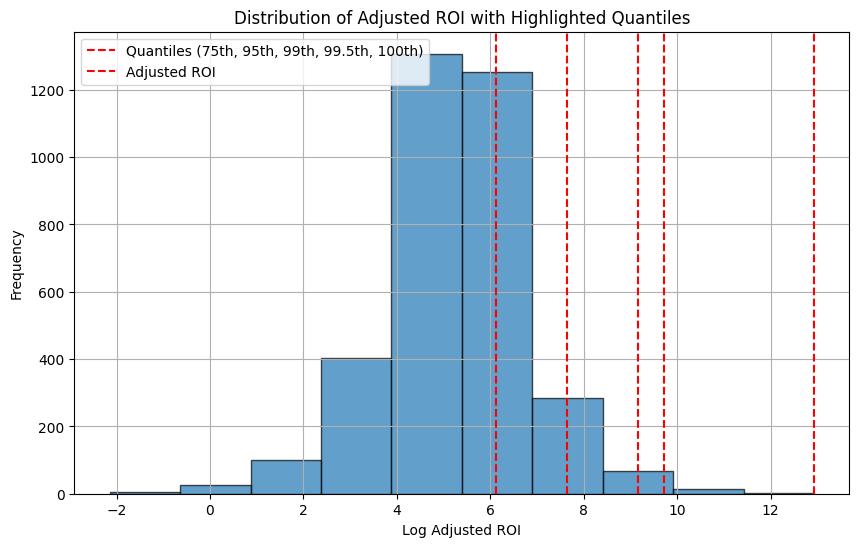

In [333]:
set_df = df.copy()
percentiles = df['adjusted_ROI'].quantile([0.75, 0.95, 0.99, 0.995, 1])
print(percentiles)

# let's see percentile on the graph, but first let's apply log adjusted_ROI for better visualization and analysis

import numpy as np
set_df['log_adjusted_ROI'] = np.log1p(set_df['adjusted_ROI'])
log_quantiles = set_df['log_adjusted_ROI'].quantile([0.75, 0.95, 0.99, 0.995, 1])

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(set_df['log_adjusted_ROI'], bins=10, edgecolor='k', alpha=0.7)
for quantile in log_quantiles:
    plt.axvline(x=quantile, color='red', linestyle='--')
plt.xlabel('Log Adjusted ROI')
plt.ylabel('Frequency')
plt.title('Distribution of Adjusted ROI with Highlighted Quantiles')
plt.legend(['Quantiles (75th, 95th, 99th, 99.5th, 100th)', 'Adjusted ROI'])
plt.grid(True)
plt.show()


So you can see that outliers is somewhere between 99.5% and 100%. Let's see the list of the most profitable movies

In [334]:
quantile_99 = set_df['adjusted_ROI'].quantile(0.995)
max_value = set_df['adjusted_ROI'].max()  # This corresponds to the 100th percentile

count_between = set_df[(set_df['adjusted_ROI'] > quantile_99) & (set_df['adjusted_ROI'] <= max_value)].shape[0]

print(f'Number of values between 99th and 100th percentiles: {count_between}')

set_df[(set_df['adjusted_ROI'] > quantile_99) & (set_df['adjusted_ROI'] <= max_value)][['title', "adjusted_ROI"]].sort_values(by='adjusted_ROI', ascending=False)


Number of values between 99th and 100th percentiles: 26


,title,adjusted_ROI
1915,the blair witch project,414298.50
4112,deep throat,399900.00
4649,paranormal activity,89832.93
2322,lady frankenstein,69741.50
547,pink flamingos,49900.00
884,open water,41952.27
3279,behind the green door,41566.67
928,the texas chain saw massacre,36252.94
2087,mad max,28471.43
272,el mariachi,28148.03


I checked first 2 outliers - https://en.wikipedia.org/wiki/The_Blair_Witch_Project and https://en.wikipedia.org/wiki/Deep_Throat_(film) and they indeed have very high ROI so they look legit.

Additionaly, I googled 'good ROI in movie industry' so I got different answers, but most of them were "3x its budget". This rule suggests that for a movie to be considered financially successful, it should earn at least three times its production budget. This is because the production budget often only accounts for the costs of filming. There are many other expenses, like marketing, distribution, and operational costs, that are also incurred during a movie's release.

If you look at ROI distribution you also might notice that ROI=300 is almost 75th percentile.

Here's how we'll label the ROI based on the "3x its budget" rule to indicate whether a movie is a hit or a flop:

- **ROI < 300% (or 3x its budget): Flop**

If a movie's ROI is less than 300%, it means the revenue generated didn't cover the production budget and the additional expenses to a satisfactory extent. It's a sign of financial underperformance, and hence, we label it as a 'flop'.

- **ROI ≥ 300% (or 3x its budget): Hit**

Conversely, if a movie's ROI is 300% or higher, it suggests that the revenue generated was substantial, covering the production budget and the additional expenses, with a healthy profit margin. Therefore, we label it as a 'hit'.
Labeling movies in this manner will help us, and any potential investors or stakeholders, quickly identify the financial performance of movies in our dataset

In [335]:
def categorize_roi(roi):
    if roi < 300:
        return 'flop'
    else:
        return 'hit'

# Apply the categorization function to the ROI column
df['ROI_category'] = df['adjusted_ROI'].apply(categorize_roi)

label_mapping = {
    'flop': 0,
    'hit': 1
}
df['numerical_ROI_category'] = df['ROI_category'].map(label_mapping)

df.drop(['ROI_category', 'adjusted_boxoffice', 'adjusted_budget', 'adjusted_revenue'], axis=1, inplace=True)
#df.drop(['ROI_category', 'adjusted_ROI', 'adjusted_boxoffice', 'adjusted_budget', 'adjusted_revenue'], axis=1, inplace=True)

### Ratings

In [336]:
print(df[['tmdb_rating', 'tmdb_vote_count',  'imdb_rating', 'imdb_votes', 'rotten_tomatoes_rating', 'metacritic_rating']].info())
df[['tmdb_rating', 'tmdb_vote_count',  'imdb_rating', 'imdb_votes', 'rotten_tomatoes_rating', 'metacritic_rating']].describe()

<class 'pandas.core.frame.DataFrame'>
Index: 5029 entries, 0 to 5539
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tmdb_rating             5029 non-null   float64
 1   tmdb_vote_count         5029 non-null   int64  
 2   imdb_rating             5028 non-null   float64
 3   imdb_votes              5029 non-null   float64
 4   rotten_tomatoes_rating  4566 non-null   float64
 5   metacritic_rating       4103 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 275.0 KB
None


,tmdb_rating,tmdb_vote_count,imdb_rating,imdb_votes,rotten_tomatoes_rating,metacritic_rating
count,5029.00,5029.00,5028.00,5029.00,4566.00,4103.00
mean,63.99,1656.39,64.37,105297.44,56.75,55.63
std,8.61,2967.52,10.35,200671.44,27.88,18.42
min,0.00,0.00,17.00,22.00,0.00,1.00
25%,58.84,199.00,58.00,13056.00,33.00,42.00
50%,64.30,597.00,65.00,38150.00,60.00,56.00
75%,69.87,1727.00,72.00,110295.00,82.00,69.00
max,100.00,34612.00,93.00,2802199.00,100.00,100.00


/Users/olgabraginskaya/.pyenv/versions/3.11.4/envs/ml_camp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/olgabraginskaya/.pyenv/versions/3.11.4/envs/ml_camp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/olgabraginskaya/.pyenv/versions/3.11.4/envs/ml_camp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


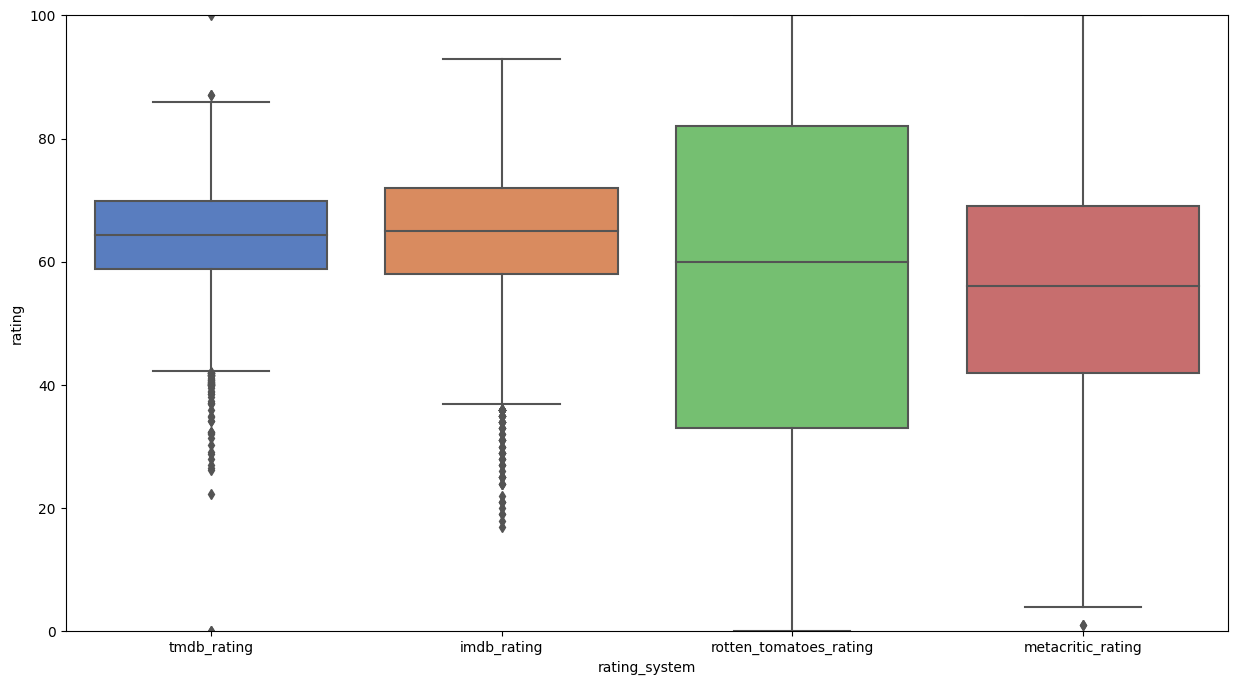

In [337]:
melted_df = df.melt(value_vars=['tmdb_rating', 'imdb_rating', 'rotten_tomatoes_rating', 'metacritic_rating'],
                    var_name='rating_system', value_name='rating')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))
sns.boxplot(x='rating_system', y='rating', data=melted_df, palette="muted", ax=ax)
ax.set_ylim([0, 100])  

plt.show()

In [338]:
zero_counts = (df[['tmdb_rating', 'tmdb_vote_count',  'imdb_rating', 'imdb_votes', 'rotten_tomatoes_rating', 'metacritic_rating']] == 0).sum()

print(zero_counts)


tmdb_rating                2
tmdb_vote_count            2
imdb_rating                0
imdb_votes                 0
rotten_tomatoes_rating    44
metacritic_rating          0
dtype: int64


In our dataset, we have access to the number of votes a movie has received on both TMDB (tmdb_vote_count) and IMDb (imdb_votes). It's a well-observed phenomenon that the rating of a movie can significantly depend on the number of votes it has received; a movie with a higher number of votes is likely to have a more reliable rating as compared to a movie with fewer votes. This is because a larger voting pool reduces the chance of skewed ratings.

To account for this voting discrepancy and to provide a balanced view of a movie's rating, I will apply a Weighted Rating Formula. This formula not only considers the average rating of a movie but also the number of votes it has garnered. By doing so, it gives us a more conservative estimate of a movie’s rating, particularly when the movie has fewer votes. This weighted rating thus corrects the bias in rating due to a varied number of votes, offering a more accurate reflection of a movie's popularity and quality. 

**Adjusting Ratings based on Vote Counts:**

A weighted rating formula is often used to compute a score that reflects both the average rating of an item and the number of ratings the item has received. This helps to give a more balanced view of the item's popularity and quality, compared to simply using the average rating which can be easily skewed by a small number of high or low ratings.

One common formula used for this purpose is the IMDb (Internet Movie Database) weighted rating formula, which is as follows:

Weighted Rating(WR) = (v/(v+m))*R + (m/(v+m)) * C
where:

- v is the number of votes for the item,
- m is the minimum number of votes required for the item to be listed,
- R is the average rating of the item,
- C is the mean rating across the whole dataset.

the 70th percentile (0.70 quantile) is used to set a threshold for the minimum number of votes a movie must have to be included in the weighted rating calculation. This means that only movies with a number of votes higher than 70% of the movies in the dataset will have a weighted rating significantly influenced by their own average rating. For movies with a number of votes below this threshold, the global average rating will have a more significant influence on their weighted rating.

In [339]:
m = df['tmdb_vote_count'].quantile(0.70)  # minimum votes required to be listed
C = df['tmdb_rating'].mean()  # mean rating across the whole dataset

print('tmdb minimum votes:', m)
print('tmdb mean rating across the whole dataset:', C)

# Function to compute weighted rating
def weighted_rating(x, m=m, C=C):
    v = x['tmdb_vote_count']
    R = x['tmdb_rating']
    return (v / (v + m) * R) + (m / (m + v) * C)

df['weighted_tmdb_rating'] = df.apply(weighted_rating, axis=1)

m = df['imdb_votes'].quantile(0.70)  # minimum votes required to be listed
C = df['imdb_rating'].mean()  # mean rating across the whole dataset

print('imdb minimum votes:', m)
print('imdb mean rating across the whole dataset:', C)

# Function to compute weighted rating
def weighted_rating(x, m=m, C=C):
    v = x['imdb_votes']
    R = x['imdb_rating']
    return (v / (v + m) * R) + (m / (m + v) * C)

df['weighted_imdb_rating'] = df.apply(weighted_rating, axis=1)

print(df[['imdb_rating', 'imdb_votes', 'weighted_tmdb_rating',  'tmdb_vote_count',  'tmdb_rating','weighted_imdb_rating', 'rotten_tomatoes_rating',	'metacritic_rating']].describe())


tmdb minimum votes: 1395.1999999999998
tmdb mean rating across the whole dataset: 63.990578643865575
imdb minimum votes: 89596.19999999998
imdb mean rating across the whole dataset: 64.3717183770883
       imdb_rating  imdb_votes  weighted_tmdb_rating  tmdb_vote_count  \
count      5028.00     5029.00               5029.00          5029.00   
mean         64.37   105297.44                 65.04          1656.39   
std          10.35   200671.44                  3.91          2967.52   
min          17.00       22.00                 43.70             0.00   
25%          58.00    13056.00                 63.20           199.00   
50%          65.00    38150.00                 64.02           597.00   
75%          72.00   110295.00                 65.95          1727.00   
max          93.00  2802199.00                 85.80         34612.00   

       tmdb_rating  weighted_imdb_rating  rotten_tomatoes_rating  \
count      5029.00               5028.00                 4566.00   
mean   

The weighted rating formula helps in balancing the ratings, especially for movies with a lower number of votes. Movies with fewer votes are pulled towards the mean rating to a greater extent than movies with a higher number of votes. This reduces the likelihood of extreme ratings for movies with few votes, making the distribution of ratings more balanced and less skewed. Movies with a higher vote count have ratings that are more reflective of the general audience's opinion, and their weighted ratings are less affected by the formula. 

By regressing ratings towards the mean, the formula reduces the influence of outlier ratings. This is particularly useful when there are movies with very high or very low ratings but with a small number of votes, which could otherwise distort the overall distribution.

/Users/olgabraginskaya/.pyenv/versions/3.11.4/envs/ml_camp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/olgabraginskaya/.pyenv/versions/3.11.4/envs/ml_camp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


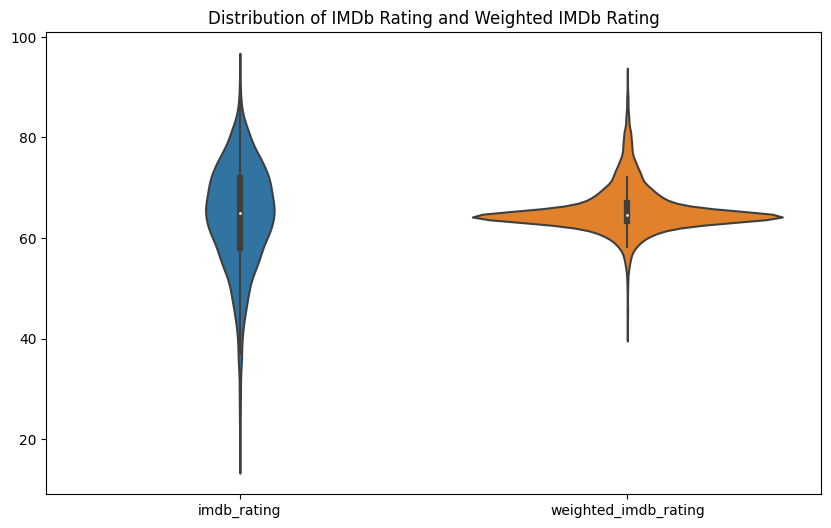

/Users/olgabraginskaya/.pyenv/versions/3.11.4/envs/ml_camp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/olgabraginskaya/.pyenv/versions/3.11.4/envs/ml_camp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


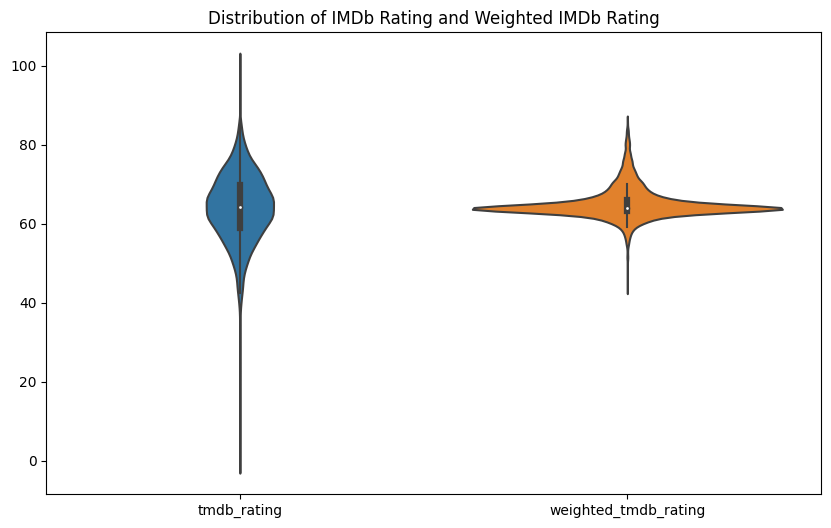

In [340]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df[['imdb_rating', 'weighted_imdb_rating']])
plt.title('Distribution of IMDb Rating and Weighted IMDb Rating')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(data=df[['tmdb_rating', 'weighted_tmdb_rating']])
plt.title('Distribution of IMDb Rating and Weighted IMDb Rating')
plt.show()


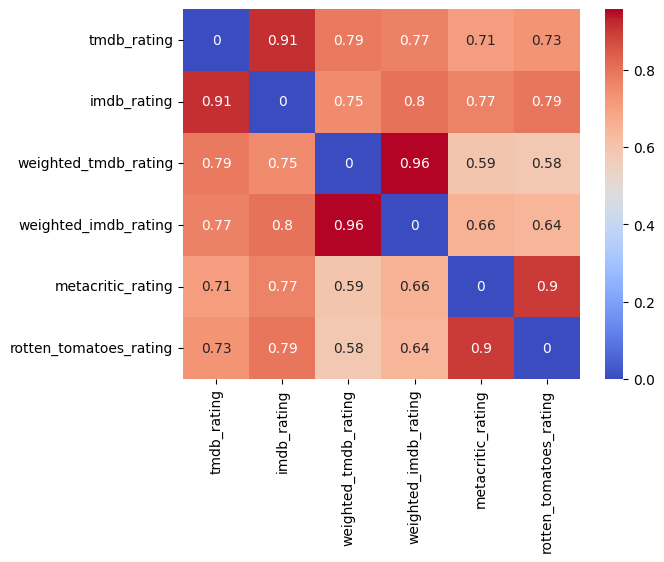

('weighted_tmdb_rating', 'weighted_imdb_rating')


In [341]:
corr_matrix = df[[ "tmdb_rating", 'imdb_rating', 
                             "weighted_tmdb_rating", 'weighted_imdb_rating', 
                             'metacritic_rating', 'rotten_tomatoes_rating']].corr()

# Compute the correlation matrix
for i in range(corr_matrix.shape[0]):
    corr_matrix.iloc[i, i] = 0

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.show()

max_corr_value = corr_matrix.abs().max().max()
result = corr_matrix.where(corr_matrix == max_corr_value).stack().index.tolist()[0]

print(result)


The correlation coefficient of 0.96 between normalized_weighted_tmdb_rating and normalized_weighted_imdb_rating indicates a very strong positive linear relationship between these two variables. It makes sense to average them separately as they might be capturing similar aspects of the movie's quality.

In [342]:
df['average_rating'] = (df['weighted_tmdb_rating'] + df['weighted_imdb_rating']) / 2

# let's look at the top rates movies
top_movies = df.sort_values(by='average_rating', ascending=False)
top_movies[['title', 'average_rating']].head(15)


,title,average_rating
4176,the shawshank redemption,88.96
4151,the godfather,88.13
5501,the dark knight,86.70
5483,the lord of the rings: the return of the king,86.19
3595,schindler's list,86.15
4153,the godfather part ii,85.94
540,pulp fiction,85.91
846,forrest gump,85.38
2236,fight club,85.24
3099,inception,85.03


Currently for simplicity we aim to categorize movies into 'hit' or 'flop' based on their average ratings.
I chose a simplistic approach to label the top 25% of movies (in terms of average_rating) as 'hit', while the remaining 75% are labeled as 'flop'. This is a straightforward method to distinguish higher-rated movies from the lower-rated ones.

In [343]:
df['rating_category'] = 'flop'  # Initially mark all rows as 'flop'
top_25_percentile_threshold = df['average_rating'].quantile(0.75)  # Calculate the 75th percentile which is the threshold for top 25%
df.loc[df['average_rating'] >= top_25_percentile_threshold, 'rating_category'] = 'hit'  # Mark rows above or equal to the threshold as 'hit'

label_mapping = {
    'flop': 0,
    'hit': 1
}
df['numerical_rating_category'] = df['rating_category'].map(label_mapping)
df.drop(['rating_category', 
                             'rotten_tomatoes_rating', 'metacritic_rating', 'imdb_rating', 'tmdb_rating',  
                             'weighted_imdb_rating', 'weighted_tmdb_rating', 'tmdb_vote_count', 'imdb_votes'], axis=1, inplace=True)


### Awards

In [344]:
df[['oscar_won',   'oscar_nominated', 'bafta_won', 'bafta_nominated', 'awards_won', 'awards_nominated']].describe()

,oscar_won,oscar_nominated,bafta_won,bafta_nominated,awards_won,awards_nominated
count,5029.00,5029.00,5029.00,5029.00,5029.00,5029.00
mean,0.19,0.27,0.01,0.03,5.66,9.94
std,0.84,0.89,0.12,0.21,13.49,18.29
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,1.00
50%,0.00,0.00,0.00,0.00,1.00,4.00
75%,0.00,0.00,0.00,0.00,5.00,11.00
max,11.00,11.00,4.00,5.00,215.00,220.00


In [345]:
# Import necessary libraries
import pandas as pd

# Top 10 movies by oscar_won
top10_oscar_won = df.nlargest(10, 'oscar_won')

# Top 10 movies by bafta_won
top10_bafta_won = df.nlargest(10, 'bafta_won')

# Top 10 movies by awards_won
top10_awards_won = df.nlargest(10, 'awards_won')

# To display the top 10 lists
print("Top 10 movies by Oscar wins:")
print(top10_oscar_won[['title', 'oscar_won']])

print("\nTop 10 movies by BAFTA wins:")
print(top10_bafta_won[['title', 'bafta_won']])

print("\nTop 10 movies by Total awards won:")
print(top10_awards_won[['title', 'awards_won']])


Top 10 movies by Oscar wins:
                                              title  oscar_won
528                                         ben-hur         11
2271                                        titanic         11
5483  the lord of the rings: the return of the king         11
1173                                west side story         10
2860                                           gigi          9
3212                               the last emperor          9
3589                            the english patient          9
521                               on the waterfront          8
1498                                   my fair lady          8
1622                          from here to eternity          8

Top 10 movies by BAFTA wins:
                                        title  bafta_won
4118                         a bridge too far          4
2637                        strictly ballroom          3
82                       pink floyd: the wall          2
1050                

I referred to this link to gather some additional info on movie awards: https://www.imdb.com/title/<IMDB_ID>/awards/. The columns awards_won and awards_nominated obviously represent the total count of all awards won and nominated respectively.

For instance, if we consider 'The Lord of the Rings: The Return of the King' (link) or 'Titanic' (link), it's evident from the dataset that only the Oscars are mentioned. However, there's no mention of BAFTA awards, which might suggest that the dataset primarily highlights the most prestigious award(s) a movie has received.

Let's check my theory if we have for any movie oscar and bafta together:

In [346]:

titles_of_interest = ['titanic', 'the lord of the rings: the return of the king']
filtered_rows = df[df['title'].isin(titles_of_interest)]
print(filtered_rows[['oscar_won',   'oscar_nominated', 'bafta_won', 'bafta_nominated', 'awards_won', 'awards_nominated']])

non_empty_awards_rows = df[(df['oscar_won'].notnull() & df['oscar_won'] > 0) & (df['bafta_won'].notnull() & df['bafta_won'] > 0)]
print(non_empty_awards_rows)

      oscar_won  oscar_nominated  bafta_won  bafta_nominated  awards_won  \
1136          1                0          0                0           1   
2271         11                0          0                0         126   
5483         11                0          0                0         215   

      awards_nominated  
1136                 3  
2271                83  
5483               124  
Empty DataFrame
Columns: [title, release_year, release_month, original_language, spoken_languages, genres, production_companies, production_countries, runtime, rated, tagline, overview, plot, tmdb_popularity, cast, crew, collection, oscar_won, oscar_nominated, bafta_won, bafta_nominated, awards_won, awards_nominated, adjusted_ROI, numerical_ROI_category, average_rating, numerical_rating_category]
Index: []

[0 rows x 27 columns]


We can create a Points System to combine these awards into one score. We'll give more points for winning awards and some extra points for nominations. Oscars will get the highest points, followed by BAFTA, and then other awards. We'll also take out the BAFTA and Oscar counts from the total awards number.

Points:

Oscar Win: 5 points
Oscar Nomination: 3 points
BAFTA Win: 4 points
BAFTA Nomination: 2 points
Other Award Win: 3 points
Other Award Nomination: 1 point"

In [347]:
df['award_points'] = (df['oscar_won'] * 5 + df['oscar_nominated'] * 3 +
                      df['bafta_won'] * 4 + df['bafta_nominated'] * 2 +
                      (df['awards_won'] - df['oscar_won'] - df['bafta_won']) * 3 + 
                      (df['awards_nominated'] - df['oscar_nominated'] - df['bafta_nominated']) * 1)

df[['award_points', 'oscar_won',   'oscar_nominated', 'bafta_won', 'bafta_nominated', 'awards_won', 'awards_nominated']]

,award_points,oscar_won,oscar_nominated,bafta_won,bafta_nominated,awards_won,awards_nominated
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,43,4,0,0,0,9,8
4,3,0,0,0,0,0,3
5,3,0,0,0,0,0,3
...,...,...,...,...,...,...,...
5534,17,0,0,0,0,3,8
5535,1,0,0,0,0,0,1
5536,6,0,0,0,0,2,0
5537,0,0,0,0,0,0,0


count   5029.00
mean      27.89
std       57.80
min        0.00
25%        2.00
50%        9.00
75%       27.00
max      791.00
Name: award_points, dtype: float64


/Users/olgabraginskaya/.pyenv/versions/3.11.4/envs/ml_camp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


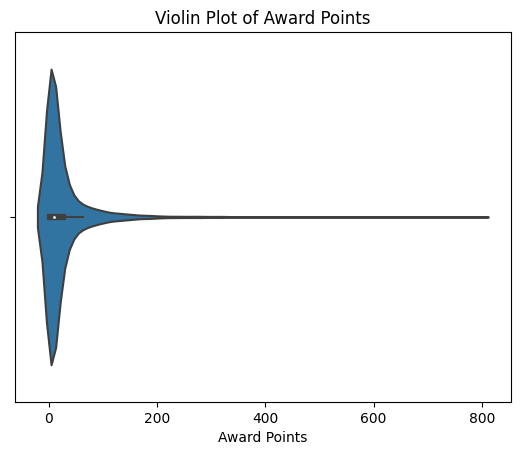

In [348]:
print(df['award_points'].describe())
sns.violinplot(x=df['award_points'])
plt.title('Violin Plot of Award Points')
plt.xlabel('Award Points')
plt.show()


the top 25% of the movies based on award points are labeled as 'hit' while the rest are labeled as 'flop'. This threshold is chosen to maintain consistency with the methodology applied to other metrics like ROI and average ratings. 

In [349]:
# Determine the 75th percentile value
threshold = df['award_points'].quantile(0.75)

# Create a new column 'award_label'
df['award_category'] = ['hit' if x >= threshold else 'flop' for x in df['award_points']]

# Checking the first few rows to see the new 'award_label' column
print(df[['award_points', 'award_category']].head())

label_mapping = {
    'flop': 0,
    'hit': 1
}
df['numerical_award_category'] = df['award_category'].map(label_mapping)
df.drop(['award_category', 'oscar_won',   'oscar_nominated', 'bafta_won', 'bafta_nominated', 'awards_won', 'awards_nominated'], axis=1, inplace=True)


   award_points award_category
0             0           flop
1             0           flop
2            43            hit
4             3           flop
5             3           flop


In [357]:
df.columns

Index(['title', 'release_year', 'release_month', 'original_language',
       'spoken_languages', 'genres', 'production_companies',
       'production_countries', 'runtime', 'rated', 'tagline', 'overview',
       'plot', 'tmdb_popularity', 'cast', 'crew', 'collection', 'adjusted_ROI',
       'numerical_ROI_category', 'average_rating', 'numerical_rating_category',
       'award_points', 'numerical_award_category', 'is_english', 'era'],
      dtype='object')

### Metrics correlation

Let's look at our metrics correlation

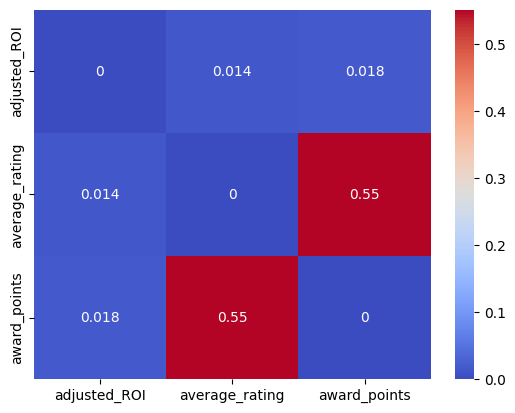

('average_rating', 'award_points')


In [358]:
corr_matrix = df[[ "adjusted_ROI", 'average_rating', 
                             "award_points"]].corr()

# Compute the correlation matrix
for i in range(corr_matrix.shape[0]):
    corr_matrix.iloc[i, i] = 0

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.show()

max_corr_value = corr_matrix.abs().max().max()
result = corr_matrix.where(corr_matrix == max_corr_value).stack().index.tolist()[0]

print(result)

The correlation number between 'average_rating' and 'award_points' shows that there is a somewhat strong link between the average rating of a movie and the award points it gets. Basically, if a movie has a higher rating, it's somewhat more likely to have more award points too. This makes sense because good movies are often liked by viewers and also get awards.

But, a 0.55 number isn't super strong, so there are probably other things affecting award points that we're not seeing here. And just because two things are linked doesn't mean one causes the other.

there's pretty much no relationship between a movie's Return on Investment (ROI) and its average rating or award points. In other words, just because a movie makes more money (has a higher ROI), it doesn’t mean people will rate it higher or that it will win more awards. And vice versa, a well-rated movie or a movie with lots of awards doesn’t necessarily make more money.

The idea here is that a movie can be successful in many ways - it could make a lot of money, people could love it, or it could win a lot of awards. Our numbers are helping us see these different kinds of success and how they relate to each other.

The most popular movie original language in the dataset is english.

In [350]:
english_others_ratio = (len(df[df['original_language'] =='en']) / len(df)) * 100
print(f"The ratio of English to non-English movies is: {english_others_ratio:.2f}%")

df['original_language'].value_counts()



The ratio of English to non-English movies is: 89.34%


original_language
en    4493
fr      98
hi      86
ja      67
es      40
ru      36
de      31
it      28
cn      25
ko      22
zh      17
sv       9
pt       9
nl       8
tr       7
ta       6
he       5
da       5
th       5
pl       4
no       3
ro       3
el       3
fi       3
vi       2
cs       2
te       2
hu       2
ms       1
ml       1
et       1
tn       1
km       1
iu       1
kn       1
fa       1
Name: count, dtype: int64

So, we can create a new feature called is_english in our dataframe. This feature will indicate whether the original language of the movie is English or not. 

In [351]:
df['is_english'] = df['original_language'].apply(lambda x: 1 if x=='en' else 0)
features_df = df.drop('original_language', axis=1)

In [352]:
df['spoken_languages'].value_counts()

spoken_languages
en             3154
en,es           158
en,fr           119
es,en            77
en,it            70
               ... 
cn,en,ms,th       1
en,it,fa          1
en,fr,nl,sm       1
de,en,yi          1
en,fr,la,gd       1
Name: count, Length: 648, dtype: int64

/Users/olgabraginskaya/.pyenv/versions/3.11.4/envs/ml_camp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/olgabraginskaya/.pyenv/versions/3.11.4/envs/ml_camp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/olgabraginskaya/.pyenv/versions/3.11.4/envs/ml_camp/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/olgabraginskaya/.pyenv/versions/3.11.4/envs/ml_camp/lib/python3.11/site-packages

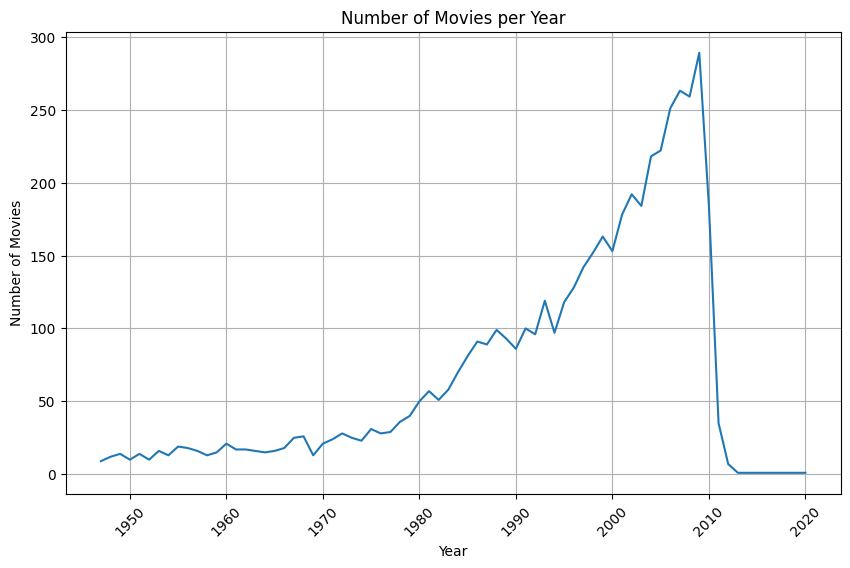

In [353]:
# Get the count of movies per year
movies_per_year = df['release_year'].value_counts().sort_index()

# Create the plot
plt.figure(figsize=(10,6))
sns.lineplot(data=movies_per_year)
plt.title('Number of Movies per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

In our dataset, each movie has a release year associated with it. However, looking at individual years can be a bit overwhelming, and might not provide a clear picture of trends over time. This is because the movie industry has evolved over decades, and the circumstances surrounding movie production, distribution, and reception can vary greatly from one decade to another.

To make our analysis more insightful and easier to interpret, we've created a new column named era. This column categorizes movies into distinct time periods, specifically decades, such as '1940-1950', '1950-1960', and so on. By doing this, we aim to simplify our dataset and potentially uncover trends or patterns that occur over these broader time periods rather than on a year-by-year basis.

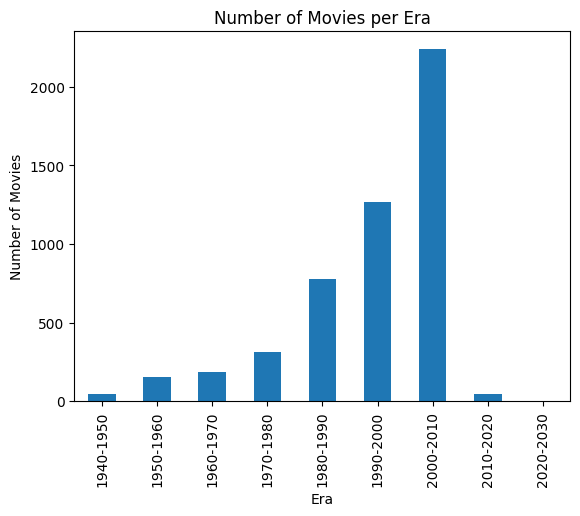

In [354]:
# Create bins and labels as you have done
bins = [1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2030]
labels = ['1940-1950', '1950-1960', '1960-1970', '1970-1980', '1980-1990','1990-2000', '2000-2010', '2010-2020', '2020-2030']

# Use pd.cut to create the 'era' column
df['era'] = pd.cut(df['release_year'], bins=bins, labels=labels, include_lowest=True)

era_counts = df['era'].value_counts().sort_index()

# Create the bar plot
era_counts.plot(kind='bar')

# Add title and labels
plt.title('Number of Movies per Era')
plt.xlabel('Era')
plt.ylabel('Number of Movies')

# Show the plot
plt.show()


Let's look at release_month

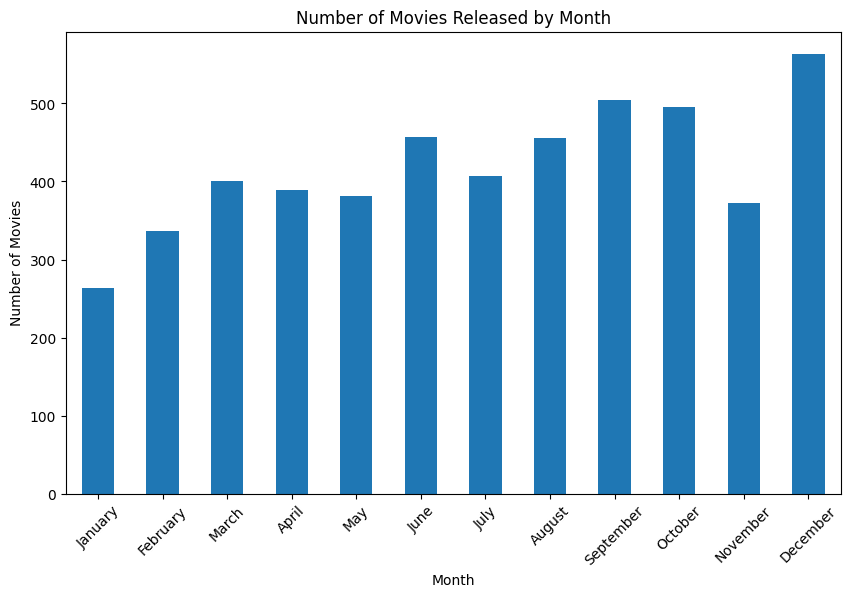

In [355]:
month_counts = df['release_month'].value_counts().sort_index()
month_counts.plot(kind='bar', figsize=(10,6))

plt.title('Number of Movies Released by Month')
plt.xlabel('Month')
plt.ylabel('Number of Movies')
plt.xticks(ticks=range(12), labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=45)
plt.show()

!TODO: The Popularity score seems to be an extremely skewed quentity with a mean of only 2.9 but maximum values reaching as high as 547, which is almost 1800% greater than the mean. However, as can be seen from the distribution plot, almost all movies have a popularity score less than 10 (the 75th percentile is at 3.678902).

<Axes: ylabel='Frequency'>

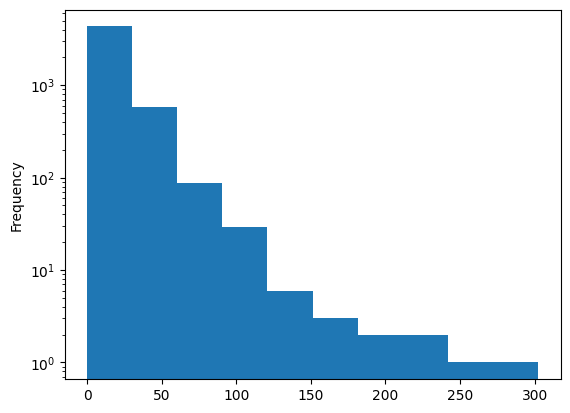

In [356]:
df['tmdb_popularity'].plot(logy=True, kind='hist')